In [1]:
import re
from collections import defaultdict

def extract_keyword(msg):
    """
    Extract the angular convention keyword from a commit message.
    
    Args:
    msg (str): The commit message to extract the keyword from.
    
    Returns:
    str: The extracted keyword, or None if no keyword is found.
    """
    pattern = r'^(build|ci|docs|feat|fix|perf|refactor|style|test)(\((\s|\S)+\))?:'
    match = re.match(pattern, msg)
    if match:
        return match.group(1)
    return None

def count_keywords(messages):
    """
    Count the occurrence of each keyword in a list of commit messages.
    
    Args:
    messages (list of str): The list of commit messages.
    
    Returns:
    dict: A dictionary with keywords as keys and their counts as values.
    """
    keyword_counts = defaultdict(int)
    
    for msg in messages:
        keyword = extract_keyword(msg)
        if keyword:
            keyword_counts[keyword] += 1
    
    return dict(keyword_counts)

def has_same_keyword(msg1, msg2):
    """
    Check if two commit messages have the same Angular convention keyword.
    
    Args:
    msg1 (str): The first commit message.
    msg2 (str): The second commit message.
    
    Returns:
    bool: True if both messages have the same keyword, False otherwise.
    """
    keyword1 = extract_keyword(msg1)
    keyword2 = extract_keyword(msg2)
    return keyword1 == keyword2

def count_same_keywords(messages1, messages2):
    """
    Count the occurrence of each keyword match between two lists of commit messages.
    
    Args:
    messages1 (list of str): The first list of commit messages.
    messages2 (list of str): The second list of commit messages.
    
    Returns:
    dict: A dictionary with keywords as keys and their match counts as values.
    """
    keyword_counts = defaultdict(int)
    
    for msg1, msg2 in zip(messages1, messages2):
        if has_same_keyword(msg1, msg2):
            keyword = extract_keyword(msg1)
            if keyword:
                keyword_counts[keyword] += 1
    
    return dict(keyword_counts)

In [24]:
import json
for method in ['e5_100_prompt', 'e5_250_prompt', 'e5_prompt', 'miniLM_prompt', 'mxbai_prompt', 'golden_prompt']:
    with open(f"../data/angular_filtered/rag/rag_test_data_{method}.json", 'r', encoding='utf-8') as file:
        data = json.load(file)
    org_msg = [item['msg'] for item in data]
    sim_msg = [item['sim_msg'] for item in data]
    same_counts = count_same_keywords(org_msg, sim_msg)
    print(f"method is {method}, same count is {same_counts}.")

method is e5_100_prompt, same count is {'chore': 20, 'fix': 173, 'test': 13, 'feat': 17, 'refactor': 6, 'docs': 2}.
method is e5_250_prompt, same count is {'fix': 176, 'test': 10, 'refactor': 13, 'chore': 21, 'feat': 24, 'docs': 4, 'style': 1}.
method is e5_prompt, same count is {'chore': 24, 'test': 13, 'fix': 195, 'refactor': 15, 'feat': 16, 'docs': 3, 'style': 1}.
method is miniLM_prompt, same count is {'fix': 181, 'test': 11, 'chore': 20, 'feat': 17, 'refactor': 13, 'docs': 4, 'style': 1}.
method is mxbai_prompt, same count is {'fix': 183, 'test': 13, 'refactor': 14, 'chore': 24, 'feat': 21, 'docs': 3, 'style': 1}.
method is golden_prompt, same count is {'style': 5, 'test': 29, 'fix': 286, 'chore': 62, 'refactor': 36, 'feat': 67, 'docs': 20}.


In [32]:
import json
for method in ['e5_100', 'e5_250', 'e5_v2', 'miniLM', 'mxbai']:
    with open(f"../data/angular_filtered/test_result/test_data_js_gpt35_rag_{method}.json", 'r', encoding='utf-8') as file:
        data = json.load(file)
    org_msg = [item['msg'] for item in data]
    sim_msg = [item['sim_msg'] for item in data]
    gen_msg = [item['chatgpt_rag'] for item in data]
    triplet_count = 0
    double_count = 0
    for i in range(len(org_msg)):
        if has_same_keyword(org_msg[i],sim_msg[i]):
            double_count += 1
    for i in range(len(org_msg)):
        if has_same_keyword(org_msg[i],sim_msg[i]) and has_same_keyword(org_msg[i], gen_msg[i]):
            triplet_count += 1
    # same_counts = count_same_keywords(org_msg, sim_msg)
    print(f"method is {method}, double same count is {double_count}, triplet same count is {triplet_count}.")

method is e5_100, double same count is 231, triplet same count is 80.
method is e5_250, double same count is 249, triplet same count is 101.
method is e5_v2, double same count is 267, triplet same count is 119.
method is miniLM, double same count is 247, triplet same count is 105.
method is mxbai, double same count is 259, triplet same count is 107.


In [29]:
with open(f"../data/angular_filtered/test_result/test_data_js_gpt35_rag_golden.json", 'r', encoding='utf-8') as file:
    data = json.load(file)
org_msg = [item['msg'] for item in data]
sim_msg = [item['chatgpt_rag'] for item in data]
same_counts = count_same_keywords(org_msg, sim_msg)
print(f"same count is {same_counts}.")
sum_value = 0
for item, value in same_counts.items():
    sum_value += value
print(sum_value)

same count is {'test': 27, 'chore': 43, 'refactor': 29, 'feat': 32, 'fix': 22, 'docs': 15, 'style': 1}.
169


In [17]:
for data_type in ['train', 'val', 'test']:
    with open(f"../data/angular_filtered/{data_type}_data_js.json", 'r', encoding='utf-8') as file:
        data = json.load(file)
    messages = [item['msg'] for item in data]
    keyword_counts = count_keywords(messages)
    print(f"datatype is {data_type}, keyword counts is {keyword_counts}")

datatype is train, keyword counts is {'refactor': 342, 'fix': 2284, 'test': 187, 'style': 67, 'feat': 447, 'chore': 530, 'docs': 159, 'perf': 19}
datatype is val, keyword counts is {'chore': 83, 'style': 11, 'fix': 274, 'feat': 43, 'docs': 24, 'refactor': 43, 'test': 20, 'perf': 7}
datatype is test, keyword counts is {'style': 5, 'test': 29, 'fix': 286, 'chore': 62, 'refactor': 36, 'feat': 67, 'docs': 20}


In [3]:
import json
with open(f"../data/angular_filtered/data_js.json", 'r', encoding='utf-8') as file:
    data = json.load(file)
messages = [item['msg'] for item in data]
keyword_counts = count_keywords(messages)
print(f"keyword counts is {keyword_counts}")

keyword counts is {'refactor': 1513, 'fix': 10179, 'docs': 719, 'test': 893, 'feat': 1984, 'build': 205, 'perf': 93, 'ci': 58, 'style': 312}


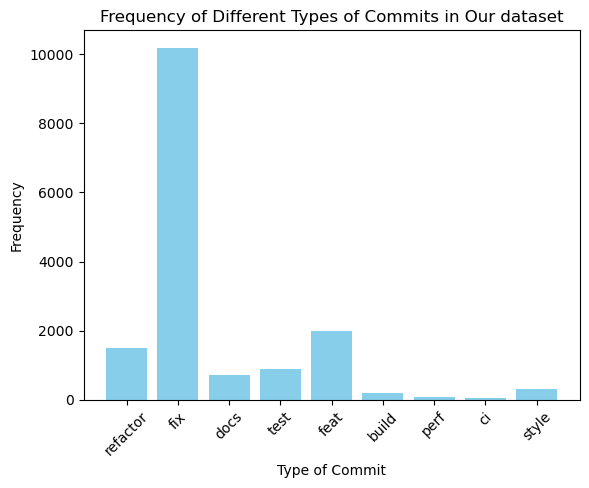

In [4]:
import matplotlib.pyplot as plt

# Extract values from the dictionary
values = list(keyword_counts.values())

# Plot the histogram
plt.bar(keyword_counts.keys(), values, color='skyblue')
plt.xlabel('Type of Commit')
plt.ylabel('Frequency')
plt.title('Frequency of Different Types of Commits in Our dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig('histogram.png', bbox_inches='tight')  # Save as PNG file, tight layout
plt.show()

In [30]:
import json
import re

def extract_keyword(msg):
    """
    Extract the angular convention keyword from a commit message.
    
    Args:
    msg (str): The commit message to extract the keyword from.
    
    Returns:
    str: The extracted keyword, or None if no keyword is found.
    """
    pattern = r'^(chore|docs|feat|fix|perf|refactor|style|test)(\((\s|\S)+\))?:'
    match = re.match(pattern, msg)
    if match:
        return match.group(1)
    return None

def find_matching_item(keyword, db_items):
    """
    Find an item in the db_items list that has a matching keyword.
    
    Args:
    keyword (str): The keyword to search for.
    db_items (list): The list of items from the db JSON file.
    
    Returns:
    dict: The matching item from the db, or None if no match is found.
    """
    for item in db_items:
        if 'msg' in item and extract_keyword(item['msg']) == keyword:
            return item
    return None

def update_data_with_db(data_items, db_items):
    """
    Update data items with matching msg and diff from db items.
    
    Args:
    data_items (list): The list of items from the data JSON file.
    db_items (list): The list of items from the db JSON file.
    
    Returns:
    list: The updated list of data items.
    """
    for data_item in data_items:
        keyword = extract_keyword(data_item['msg'])
        if keyword:
            matching_db_item = find_matching_item(keyword, db_items)
            if matching_db_item:
                data_item['type'] = keyword
    return data_items

# Read the JSON files
with open('../data/angular_filtered/test_data_js.json', 'r', encoding='UTF-8') as data_file:
    data_items = json.load(data_file)

with open('../data/angular_filtered/rag_db_js.json', 'r', encoding='UTF-8') as db_file:
    db_items = json.load(db_file)

# Update the data items with matching db items
updated_data_items = update_data_with_db(data_items, db_items)

# Write the updated data items to a new JSON file
with open('../data/angular_filtered/rag/rag_test_data_golden_type_prompt.json', 'w', encoding='UTF-8') as updated_data_file:
    json.dump(updated_data_items, updated_data_file, indent=4)

print("Data has been updated and saved to 'updated_data.json'")

Data has been updated and saved to 'updated_data.json'


In [33]:
with open("../data/angular_filtered/test_data_js.json", 'r', encoding='UTF-8') as file:
    data = json.load(file)
    print(data[0])

{'msg': 'style(loader): fix lint errors', 'diff': "diff --git a/test/components/loader_spec.js b/test/components/loader_spec.js @@ -25,7 +25,6 @@ describe('Loader', function() {\nit('should not contain the MSE/Flash based playbacks when PLAIN_HTML5_ONLY is set', function() {\nconst loader = new Loader([], 0, true)\n- // expected order from previous Clappr versions\nconst expectedPlaybacks = [HTML5VideoPlayback, HTML5AudioPlayback, HTMLImgPlayback, NoOp]\nexpect(loader.playbackPlugins).to.deep.equal(expectedPlaybacks)\n})\n", 'date': '12.01.2018 13:52:38', 'repo': 'clappr/clappr-core'}


In [2]:
import json
with open('../data/angular_filtered/subsets/test_dev.json', 'r', encoding='UTF-8') as f:
    org_data = json.load(f)

# save msg to a file
with open("../data/angular_filtered/subsets/generation/dev_test_ref.txt", 'w', encoding='UTF-8') as file:
    for item in org_data:
        file.write(item['msg'].replace('\n', '\\n').replace('\r', '\\r') + '\n')

In [2]:
import json
with open('../data/angular_filtered/test_result/test_data_js_gpt35_cot.json', 'r', encoding='UTF-8') as f:
    org_data = json.load(f)
# save msg to txt
output_file = '../data/angular_filtered/test_result/test_data_js_gpt35_cot.txt'
with open(output_file, 'w', encoding='UTF-8') as f:
    for item in org_data:
        f.write(item['chatgpt_cot'].replace('\n', '\\n').replace('\r', '\\r') + '\n')

In [6]:
import json
with open('../data/angular_filtered/test_data_js.json', 'r', encoding='UTF-8') as f:
    org_data = json.load(f)
# read a txt file
output_file = '../data/angular_filtered/test_result/test_data_js_nngen_v2.txt'
with open(output_file, 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    for i in range(len(org_data)):
        org_data[i]['nngen'] = lines[i].strip()

In [7]:
# save org_data to a json file
output_file = '../data/angular_filtered/test_result/test_data_js_nngen_v2.json'
with open(output_file, 'w', encoding='UTF-8') as f:
    json.dump(org_data, f, indent=4)

In [2]:
import json
with open('../data/angular_filtered/subsets/test_dev.json', 'r', encoding='UTF-8') as f:
    org_data = json.load(f)

output_file = '../data/angular_filtered/subsets/generation/dev_test_nngen.txt'
with open(output_file, 'r', encoding='UTF-8') as f:
    lines = f.readlines()
    for i in range(len(org_data)):
        org_data[i]['nngen'] = lines[i].strip()

with open('../data/angular_filtered/subsets/generation/dev_test_nngen.json', 'w', encoding='UTF-8') as f:
    json.dump(org_data, f, indent=4)